In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dftrain = pd.read_csv("train.csv")

In [154]:
dftest = pd.read_csv("test.csv")

In [4]:
dftrain

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [173]:
dftest

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Amount
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,2832.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,7418.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,645.0
...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0
4273,Earth,False,G/160/P,TRAPPIST-1e,42.0,False,1018.0
4274,Mars,True,D/296/P,55 Cancri e,18.0,False,0.0
4275,Europa,False,D/297/P,TRAPPIST-1e,18.0,False,3203.0


In [49]:
dftrain.isnull().sum()

PassengerId    0
HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
Transported    0
Amount         0
dtype: int64

In [155]:
dftest.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [37]:
dftrain["FoodCourt"].value_counts()

FoodCourt
0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: count, Length: 1507, dtype: int64

In [167]:
dftest['VRDeck'].fillna(0.0, inplace=True)

In [168]:
dftest["Amount"] = dftest.iloc[:, 7: 12].sum(axis=1)

In [172]:
dftest.drop(columns=["Name", "PassengerId"], inplace=True)

In [21]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [23]:
def side(s):
    return s[-1]

In [28]:
dftrain["Cabin"] = dftrain["Cabin"].apply(side)

In [79]:
dftrain

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Amount,CrySleep
0,Europa,False,P,TRAPPIST-1e,39.0,False,False,0.0,1
1,Earth,False,S,TRAPPIST-1e,24.0,False,True,736.0,1
2,Europa,False,S,TRAPPIST-1e,58.0,True,False,10383.0,1
3,Europa,False,S,TRAPPIST-1e,33.0,False,False,5176.0,1
4,Earth,False,S,TRAPPIST-1e,16.0,False,True,1091.0,1
...,...,...,...,...,...,...,...,...,...
8688,Europa,False,P,55 Cancri e,41.0,True,False,8536.0,1
8689,Earth,True,S,PSO J318.5-22,18.0,False,False,0.0,1
8690,Earth,False,S,TRAPPIST-1e,26.0,False,True,1873.0,1
8691,Europa,False,S,55 Cancri e,32.0,False,False,4637.0,1


In [97]:
dftrain["HomePlanet"].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dftrain["VIP"] = le.fit_transform(dftrain["VIP"])

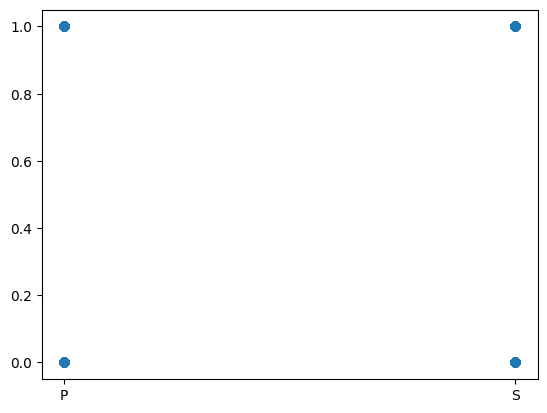

In [84]:
plt.scatter(dftrain["Cabin"], dftrain["Transported"])

In [90]:
dftrain

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,Amount,CrySleep
0,Europa,0,0,TRAPPIST-1e,39.0,0,0,0.0,1
1,Earth,0,1,TRAPPIST-1e,24.0,0,1,736.0,1
2,Europa,0,1,TRAPPIST-1e,58.0,1,0,10383.0,1
3,Europa,0,1,TRAPPIST-1e,33.0,0,0,5176.0,1
4,Earth,0,1,TRAPPIST-1e,16.0,0,1,1091.0,1
...,...,...,...,...,...,...,...,...,...
8688,Europa,0,0,55 Cancri e,41.0,1,0,8536.0,1
8689,Earth,1,1,PSO J318.5-22,18.0,0,0,0.0,1
8690,Earth,0,1,TRAPPIST-1e,26.0,0,1,1873.0,1
8691,Europa,0,1,55 Cancri e,32.0,0,0,4637.0,1


In [94]:
X_train, y_train = dftrain[["HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", "Amount"]], dftrain["Transported"]

In [88]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop="first")

In [95]:
X_train_new = ohe.fit_transform(X_train[["HomePlanet", "Destination"]]).toarray()

In [96]:
X_train_new

array([[1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.]])

In [99]:
encoder = OneHotEncoder(sparse=False)

encoded_data = encoder.fit_transform(X_train[['HomePlanet', 'Destination']])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['HomePlanet', 'Destination']))

final_df = pd.concat([encoded_df, X_train[["HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", "Amount"]]], axis=1)


/home/reputation/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [100]:
final_df

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Amount
0,0.0,1.0,0.0,0.0,0.0,1.0,Europa,0,0,TRAPPIST-1e,39.0,0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,Earth,0,1,TRAPPIST-1e,24.0,0,736.0
2,0.0,1.0,0.0,0.0,0.0,1.0,Europa,0,1,TRAPPIST-1e,58.0,1,10383.0
3,0.0,1.0,0.0,0.0,0.0,1.0,Europa,0,1,TRAPPIST-1e,33.0,0,5176.0
4,1.0,0.0,0.0,0.0,0.0,1.0,Earth,0,1,TRAPPIST-1e,16.0,0,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.0,0.0,Europa,0,0,55 Cancri e,41.0,1,8536.0
8689,1.0,0.0,0.0,0.0,1.0,0.0,Earth,1,1,PSO J318.5-22,18.0,0,0.0
8690,1.0,0.0,0.0,0.0,0.0,1.0,Earth,0,1,TRAPPIST-1e,26.0,0,1873.0
8691,0.0,1.0,0.0,1.0,0.0,0.0,Europa,0,1,55 Cancri e,32.0,0,4637.0


In [105]:
final_df.drop(columns=["HomePlanet_Earth", "Destination_TRAPPIST-1e", "HomePlanet", "Destination"], inplace=True)

In [106]:
X_train = final_df

In [108]:
X_train

,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,CryoSleep,Cabin,Age,VIP,Amount
0,1.0,0.0,0.0,0.0,0,0,39.0,0,0.0
1,0.0,0.0,0.0,0.0,0,1,24.0,0,736.0
2,1.0,0.0,0.0,0.0,0,1,58.0,1,10383.0
3,1.0,0.0,0.0,0.0,0,1,33.0,0,5176.0
4,0.0,0.0,0.0,0.0,0,1,16.0,0,1091.0
...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,1.0,0.0,0,0,41.0,1,8536.0
8689,0.0,0.0,0.0,1.0,1,1,18.0,0,0.0
8690,0.0,0.0,0.0,0.0,0,1,26.0,0,1873.0
8691,1.0,0.0,1.0,0.0,0,1,32.0,0,4637.0


In [109]:
y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [186]:
X_test = dftest

In [188]:
X_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Amount
0,Earth,1,1,TRAPPIST-1e,27.0,0,0.0
1,Earth,0,1,TRAPPIST-1e,19.0,0,2832.0
2,Europa,1,1,55 Cancri e,31.0,0,0.0
3,Europa,0,1,TRAPPIST-1e,38.0,0,7418.0
4,Earth,0,1,TRAPPIST-1e,20.0,0,645.0
...,...,...,...,...,...,...,...
4272,Earth,1,1,TRAPPIST-1e,34.0,0,0.0
4273,Earth,0,0,TRAPPIST-1e,42.0,0,1018.0
4274,Mars,1,0,55 Cancri e,18.0,0,0.0
4275,Europa,0,0,TRAPPIST-1e,18.0,0,3203.0


In [176]:
dftest["Cabin"] = dftest["Cabin"].apply(side)

In [180]:
from sklearn.preprocessing import LabelEncoder
letestt = LabelEncoder()
dftest["CryoSleep"] = letestt.fit_transform(dftest["CryoSleep"])

In [189]:
encodertestt = OneHotEncoder(sparse=False)

encoded_datatestt = encodertestt.fit_transform(X_test[['HomePlanet', 'Destination']])

encoded_dftestt = pd.DataFrame(encoded_datatestt, columns=encodertestt.get_feature_names_out(['HomePlanet', 'Destination']))

final_dftestt = pd.concat([encoded_dftestt, X_test[["HomePlanet", "CryoSleep", "Cabin", "Destination", "Age", "VIP", "Amount"]]], axis=1)


/home/reputation/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [190]:
X_test = final_dftestt

In [193]:
X_test.drop(columns=["HomePlanet_Earth", "Destination_TRAPPIST-1e", "HomePlanet", "Destination"], inplace=True)

In [196]:
X_test

,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,CryoSleep,Cabin,Age,VIP,Amount
0,0.0,0.0,0.0,0.0,1,1,27.0,0,0.0
1,0.0,0.0,0.0,0.0,0,1,19.0,0,2832.0
2,1.0,0.0,1.0,0.0,1,1,31.0,0,0.0
3,1.0,0.0,0.0,0.0,0,1,38.0,0,7418.0
4,0.0,0.0,0.0,0.0,0,1,20.0,0,645.0
...,...,...,...,...,...,...,...,...,...
4272,0.0,0.0,0.0,0.0,1,1,34.0,0,0.0
4273,0.0,0.0,0.0,0.0,0,0,42.0,0,1018.0
4274,0.0,1.0,1.0,0.0,1,0,18.0,0,0.0
4275,1.0,0.0,0.0,0.0,0,0,18.0,0,3203.0


In [195]:
X_train

,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,CryoSleep,Cabin,Age,VIP,Amount
0,1.0,0.0,0.0,0.0,0,0,39.0,0,0.0
1,0.0,0.0,0.0,0.0,0,1,24.0,0,736.0
2,1.0,0.0,0.0,0.0,0,1,58.0,1,10383.0
3,1.0,0.0,0.0,0.0,0,1,33.0,0,5176.0
4,0.0,0.0,0.0,0.0,0,1,16.0,0,1091.0
...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,1.0,0.0,0,0,41.0,1,8536.0
8689,0.0,0.0,0.0,1.0,1,1,18.0,0,0.0
8690,0.0,0.0,0.0,0.0,0,1,26.0,0,1873.0
8691,1.0,0.0,1.0,0.0,0,1,32.0,0,4637.0


In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
lr = LogisticRegression()

In [131]:
lr.fit(X_train, y_train)

LogisticRegression()

In [199]:
pred = lr.predict(X_test)

In [200]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [201]:
dfsub = pd.read_csv("test.csv")

In [202]:
sub = dfsub[["PassengerId"]]

In [213]:
sub["Transported"] = pred

/tmp/ipykernel_13381/1429925848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["Transported"] = pred


In [214]:
sub

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [215]:
def inttobool(s):
    True if s == 1 else False

In [216]:
sub["Transported"] = sub["Transported"].astype("bool")

/tmp/ipykernel_13381/2741407129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub["Transported"] = sub["Transported"].astype("bool")


In [217]:
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [218]:
sub.to_csv("sub.csv")